In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


In [ ]:
#load the data

gk_data = pd.read_csv('cleaned_merged_seasons_gk.csv')
def_data = pd.read_csv('cleaned_merged_seasons_def.csv')
mid_data = pd.read_csv('cleaned_merged_seasons_mid.csv')
fwd_data = pd.read_csv('cleaned_merged_seasons_fwd.csv')


In [ ]:
#drop nan values
gk_data = gk_data.dropna()
def_data = def_data.dropna()
mid_data = mid_data.dropna()
fwd_data = fwd_data.dropna()


In [ ]:
print(gk_data.head(1))


   name  team_x  assists  bonus  bps  clean_sheets  creativity  \
0     0      19        0      0   12             0         0.0   

   goals_conceded  goals_scored  ict_index  ...  team_a_score  team_h_score  \
0               2             0        1.8  ...           2.0           0.0   

   threat  transfers_in  transfers_out  value  was_home  yellow_cards  points  \
0     0.0             0              0     50         1             0       1   

   points_after  
0           2.0  

[1 rows x 31 columns]


In [ ]:
#train a linear regression model for each position, predicvting points_after
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load and preprocess the data as before (assuming df_gk, df_def, df_mid, and df_fwd are prepared as shown previously)
gk_data = pd.read_csv('cleaned_merged_seasons_gk.csv')
def_data = pd.read_csv('cleaned_merged_seasons_def.csv')
mid_data = pd.read_csv('cleaned_merged_seasons_mid.csv')
fwd_data = pd.read_csv('cleaned_merged_seasons_fwd.csv')

# Drop NaN values to ensure data consistency
gk_data = gk_data.dropna()
def_data = def_data.dropna()
mid_data = mid_data.dropna()
fwd_data = fwd_data.dropna()

# Define a function for training the multiple linear regression model for each position
def train_multivar_linear_model(data, position):
    X = data.drop(['points_after'], axis=1)
    y = data['points_after']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the multiple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Multiple Linear Regression for {position} position')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R² Score: {r2}')

    return model

# Train models for each position
gk_multivar_model = train_multivar_linear_model(gk_data, 'GK')
def_multivar_model = train_multivar_linear_model(def_data, 'DEF')
mid_multivar_model = train_multivar_linear_model(mid_data, 'MID')
fwd_multivar_model = train_multivar_linear_model(fwd_data, 'FWD')



Multiple Linear Regression for GK position
Mean Absolute Error (MAE): 0.7577843933724949
Mean Squared Error (MSE): 2.693081443999941
R² Score: 0.4084489736081194
Multiple Linear Regression for DEF position
Mean Absolute Error (MAE): 1.2069497482763474
Mean Squared Error (MSE): 4.351138963334496
R² Score: 0.22334100096495502
Multiple Linear Regression for MID position
Mean Absolute Error (MAE): 1.0959864133362942
Mean Squared Error (MSE): 4.244605501137831
R² Score: 0.2954067490407619
Multiple Linear Regression for FWD position
Mean Absolute Error (MAE): 1.2291057583589218
Mean Squared Error (MSE): 4.899249694031764
R² Score: 0.27194902774345875


In [ ]:
#train a random forest model for each position, predicvting points_after

def train_rf_model(data, position):
    X = data.drop(['points_after'], axis=1)
    y = data['points_after']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Model for {position} position')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('R2 Score:', r2_score(y_test, y_pred))
    return model

gk_rf_model = train_rf_model(gk_data, 'GK')
def_rf_model = train_rf_model(def_data, 'DEF')
mid_rf_model = train_rf_model(mid_data, 'MID')
fwd_rf_model = train_rf_model(fwd_data, 'FWD')


Model for GK position
Mean Absolute Error: 0.7838639281129652
Mean Squared Error: 2.8139670089858795
R2 Score: 0.3818957550997393
Model for DEF position
Mean Absolute Error: 1.2211869145812946
Mean Squared Error: 4.373643967566057
R2 Score: 0.21932395756389378
Model for MID position
Mean Absolute Error: 1.1204506437768242
Mean Squared Error: 4.442339789925457
R2 Score: 0.26258338175123674
Model for FWD position
Mean Absolute Error: 1.261077441077441
Mean Squared Error: 5.139686644219978
R2 Score: 0.2362189943132026


In [ ]:
#train a xgboost model for each position, predicvting points_after
def train_xgb_model(data, position):
    X = data.drop(['points_after'], axis=1)
    y = data['points_after']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Model for {position} position')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('R2 Score:', r2_score(y_test, y_pred))
    return model

gk_xgb_model = train_xgb_model(gk_data, 'GK')
def_xgb_model = train_xgb_model(def_data, 'DEF')
mid_xgb_model = train_xgb_model(mid_data, 'MID')
fwd_xgb_model = train_xgb_model(fwd_data, 'FWD')


Model for GK position
Mean Absolute Error: 0.819925285491283
Mean Squared Error: 3.280808706521045
R2 Score: 0.2793512568801523
Model for DEF position
Mean Absolute Error: 1.2003700498758811
Mean Squared Error: 4.574674214589992
R2 Score: 0.18344095043747344
Model for MID position
Mean Absolute Error: 1.103012078617342
Mean Squared Error: 4.573118472930056
R2 Score: 0.24087446736810336
Model for FWD position
Mean Absolute Error: 1.2929742042540253
Mean Squared Error: 5.876592496783439
R2 Score: 0.1267114052074808


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

def train_rnn_model(data, position):
    try:
        print(f"\n{'='*40}")
        print(f"Starting training for {position} position...")

        # Ensure data is loaded
        print("Data Preview:")
        print(data.head())

        # Split features and target
        if 'points_after' not in data.columns:
            print("Error: 'points_after' column not found in data.")
            return
        X = data.drop(['points_after'], axis=1)
        y = data['points_after']

        print("Feature columns:", X.columns)
        print("Target column: 'points_after'")

        # Standardize features
        print("Standardizing the features...")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        print("Features standardized successfully.")

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        print(f"Training data size: {X_train.shape}")
        print(f"Test data size: {X_test.shape}")

        # Reshape input data for LSTM: [samples, timesteps, features]
        X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
        print("Data reshaped for LSTM input.")

        # Define the LSTM model
        print("Building the model...")
        model = Sequential()
        model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.3))
        model.add(LSTM(64, return_sequences=False))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1))

        # Compile the model
        print("Compiling the model...")
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

        # Callbacks for early stopping and saving the best model
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
        checkpoint = ModelCheckpoint(f'best_model_{position}.keras', monitor='val_loss', save_best_only=True, verbose=1)

        # Track training time
        start_time = time.time()

        # Train the model
        print(f"Training the model for {position} position...")
        history = model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=100,
                            batch_size=32,
                            callbacks=[early_stopping, checkpoint],
                            verbose=1)  # Shows detailed progress for each epoch

        # Track end time and print duration
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Training for {position} completed in {training_time:.2f} seconds.")

        # Evaluate the model
        print(f"Evaluating the model for {position}...")
        y_pred = model.predict(X_test)
        y_pred = np.squeeze(y_pred)  # Flatten the predictions for metric calculation
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print evaluation results
        print(f"\nEvaluation for {position} Model:")
        print('Mean Absolute Error (MAE):', mae)
        print('Mean Squared Error (MSE):', mse)
        print('R2 Score:', r2)
        print(f"{'='*40}\n")

        return model, history

    except Exception as e:
        print(f"An error occurred during training for {position}: {str(e)}")

# Train RNN models for each position with progress output
gk_rnn_model, gk_history = train_rnn_model(gk_data, 'GK')
def_rnn_model, def_history = train_rnn_model(def_data, 'DEF')
mid_rnn_model, mid_history = train_rnn_model(mid_data, 'MID')
fwd_rnn_model, fwd_history = train_rnn_model(fwd_data, 'FWD')



Starting training for GK position...
Data Preview:
   name  team_x  assists  bonus  bps  clean_sheets  creativity  \
0     0      19        0      0   12             0         0.0   
1     2      12        0      0    0             0         0.0   
2     3      20        0      0   17             0         0.0   
3     6      12        0      0    9             0         0.0   
4     7       9        0      0    0             0         0.0   

   goals_conceded  goals_scored  ict_index  ...  team_a_score  team_h_score  \
0               2             0        1.8  ...           2.0           0.0   
1               0             0        0.0  ...           3.0           4.0   
2               1             0        2.3  ...           0.0           1.0   
3               3             0        0.4  ...           3.0           4.0   
4               0             0        0.0  ...           3.0           0.0   

   threat  transfers_in  transfers_out  value  was_home  yellow_cards  point

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the model...
Training the model for GK position...
Epoch 1/100
284/292 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5119
Epoch 1: val_loss improved from inf to 2.70188, saving model to best_model_GK.keras
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3.4940 - val_loss: 2.7019
Epoch 2/100
284/292 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6629
Epoch 2: val_loss did not improve from 2.70188
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6629 - val_loss: 2.7031
Epoch 3/100
287/292 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4458
Epoch 3: val_loss did not improve from 2.70188
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4500 - val_loss: 2.7135
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7086
Epoch 4: val_loss did not improve from 2.70188
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.7084 - val_loss: 2.7353
Epoch 5/100
284/292 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7016
Epoch 5: val_loss did not improve from 2.70188
292/292 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


889/894 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7596
Epoch 1: val_loss improved from inf to 4.37436, saving model to best_model_DEF.keras
894/894 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.7576 - val_loss: 4.3744
Epoch 2/100
887/894 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2873
Epoch 2: val_loss did not improve from 4.37436
894/894 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4.2875 - val_loss: 4.3756
Epoch 3/100
892/894 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3734
Epoch 3: val_loss improved from 4.37436 to 4.35511, saving model to best_model_DEF.keras
894/894 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.3731 - val_loss: 4.3551
Epoch 4/100
893/894 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2870
Epoch 4: val_loss improved from 4.35511 to 4.33472, saving model to best_model_DEF.keras
894/894 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.2870 - val_loss: 4.3347
Epoch 5/100
887/894 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1685
Epoch 5: val_loss did not improve from 4.33472
894/894 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1099/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4874
Epoch 1: val_loss improved from inf to 4.30310, saving model to best_model_MID.keras
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 4.4855 - val_loss: 4.3031
Epoch 2/100
1103/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0334
Epoch 2: val_loss did not improve from 4.30310
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.0338 - val_loss: 4.3245
Epoch 3/100
1105/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1080
Epoch 3: val_loss improved from 4.30310 to 4.27904, saving model to best_model_MID.keras
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.1079 - val_loss: 4.2790
Epoch 4/100
1101/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0576
Epoch 4: val_loss did not improve from 4.27904
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.0576 - val_loss: 4.2853
Epoch 5/100
1105/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9193
Epoch 5: val_loss improved from 4.27904 to 4.27147, saving model to best_model_MID.ke

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6378
Epoch 1: val_loss improved from inf to 4.96060, saving model to best_model_FWD.keras
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.6347 - val_loss: 4.9606
Epoch 2/100
334/335 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0258
Epoch 2: val_loss improved from 4.96060 to 4.92351, saving model to best_model_FWD.keras
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.0259 - val_loss: 4.9235
Epoch 3/100
325/335 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0387
Epoch 3: val_loss did not improve from 4.92351
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.0375 - val_loss: 4.9542
Epoch 4/100
326/335 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9904
Epoch 4: val_loss did not improve from 4.92351
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.9906 - val_loss: 4.9269
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8996
Epoch 5: val_loss did not improve from 4.92351
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.8998 -

In [ ]:
# Define results dictionary with provided metrics for each model and position
results = {
    "GK": {
        "Multiple Linear Regression": {
            "MAE": 0.7577843933724949,
            "MSE": 2.693081443999941,
            "R2": 0.4084489736081194
        },
        "Random Forest": {
            "MAE": 0.7838639281129652,
            "MSE": 2.8139670089858795,
            "R2": 0.3818957550997393
        },
        "XGBoost": {
            "MAE": 0.819925285491283,
            "MSE": 3.280808706521045,
            "R2": 0.2793512568801523
        },
        "RNN": {
            "MAE": 0.7577325093353093,
            "MSE": 2.7018771348029365,
            "R2": 0.40651694888828416
        }
    },
    "DEF": {
        "Multiple Linear Regression": {
            "MAE": 1.2069497482763474,
            "MSE": 4.351138963334496,
            "R2": 0.22334100096495502
        },
        "Random Forest": {
            "MAE": 1.2211869145812946,
            "MSE": 4.373643967566057,
            "R2": 0.21932395756389378
        },
        "XGBoost": {
            "MAE": 1.2003700498758811,
            "MSE": 4.574674214589992,
            "R2": 0.18344095043747344
        },
        "RNN": {
            "MAE": 1.1755185224512699,
            "MSE": 4.322048445001883,
            "R2": 0.22853352941325433
        }
    },
    "MID": {
        "Multiple Linear Regression": {
            "MAE": 1.0959864133362942,
            "MSE": 4.244605501137831,
            "R2": 0.2954067490407619
        },
        "Random Forest": {
            "MAE": 1.1204506437768242,
            "MSE": 4.442339789925457,
            "R2": 0.26258338175123674
        },
        "XGBoost": {
            "MAE": 1.103012078617342,
            "MSE": 4.573118472930056,
            "R2": 0.24087446736810336
        },
        "RNN": {
            "MAE": 1.0932011023830257,
            "MSE": 4.251976121261618,
            "R2": 0.29418324565671083
        }
    },
    "FWD": {
        "Multiple Linear Regression": {
            "MAE": 1.2291057583589218,
            "MSE": 4.899249694031764,
            "R2": 0.27194902774345875
        },
        "Random Forest": {
            "MAE": 1.261077441077441,
            "MSE": 5.139686644219978,
            "R2": 0.2362189943132026
        },
        "XGBoost": {
            "MAE": 1.2929742042540253,
            "MSE": 5.876592496783439,
            "R2": 0.1267114052074808
        },
        "RNN": {
            "MAE": 1.214357579469101,
            "MSE": 4.923514714757625,
            "R2": 0.26834313438537805
        }
    }
}


In [ ]:
import pandas as pd


# Function to find the best model for each position based on a specific metric
def find_best_model(metric):
    best_models = {}
    for position, models in results.items():
        # Determine the best model based on the metric, highest for R2, lowest for others
        best_model = min(models.items(), key=lambda x: x[1][metric] if metric != 'R2' else -x[1][metric])
        best_models[position] = {'Model': best_model[0], 'Value': best_model[1][metric]}
    return best_models

# Display the best models for each metric
print("Best Models Based on Mean Absolute Error (MAE):")
best_mae_models = find_best_model('MAE')
print(pd.DataFrame(best_mae_models).T)

print("\nBest Models Based on Mean Squared Error (MSE):")
best_mse_models = find_best_model('MSE')
print(pd.DataFrame(best_mse_models).T)

print("\nBest Models Based on R² Score:")
best_r2_models = find_best_model('R2')
print(pd.DataFrame(best_r2_models).T)


Best Models Based on Mean Absolute Error (MAE):
    Model     Value
GK    RNN  0.757733
DEF   RNN  1.175519
MID   RNN  1.093201
FWD   RNN  1.214358

Best Models Based on Mean Squared Error (MSE):
                          Model     Value
GK   Multiple Linear Regression  2.693081
DEF                         RNN  4.322048
MID  Multiple Linear Regression  4.244606
FWD  Multiple Linear Regression   4.89925

Best Models Based on R² Score:
                          Model     Value
GK   Multiple Linear Regression  0.408449
DEF                         RNN  0.228534
MID  Multiple Linear Regression  0.295407
FWD  Multiple Linear Regression  0.271949


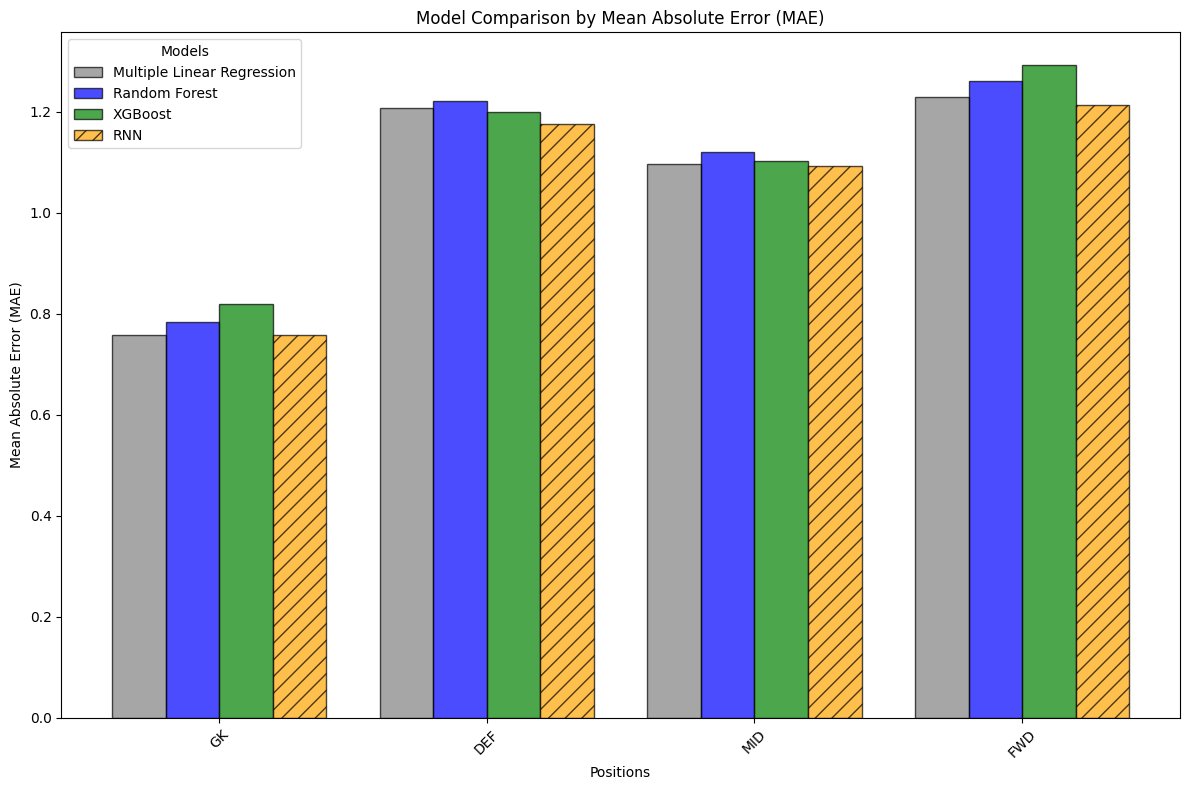

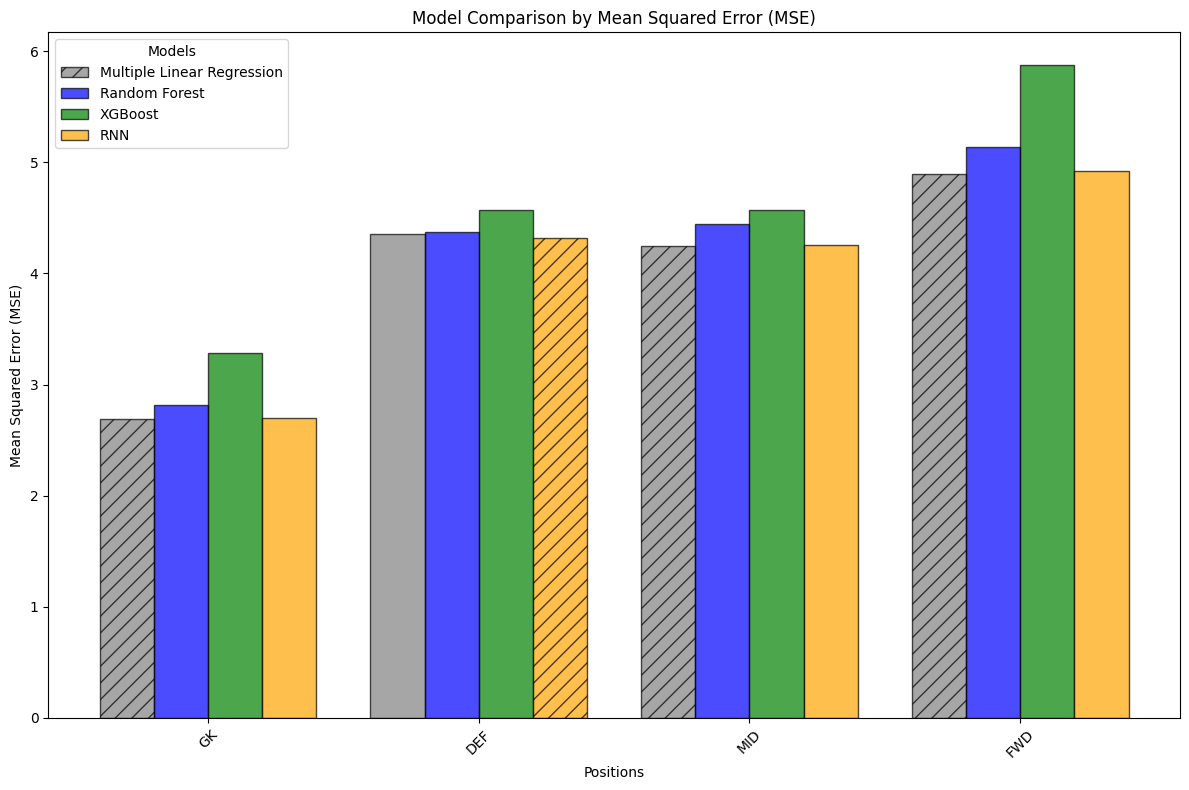

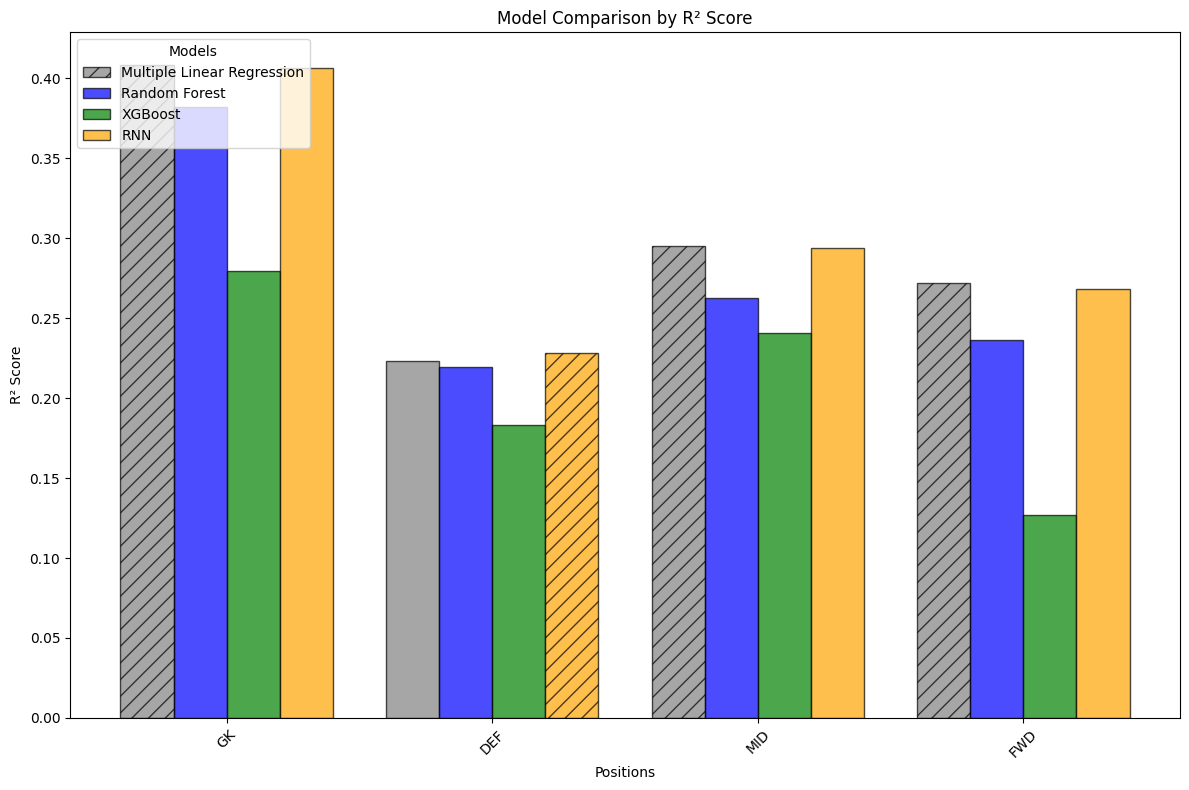

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the comparison of models for each metric
def plot_model_comparison(results, metric, metric_name, best_value_selector):
    positions = list(results.keys())
    models = list(results[positions[0]].keys())

    # Prepare data for plotting
    data = {model: [] for model in models}
    best_model_per_position = []

    for position in positions:
        # Get the values of the metric for each model
        for model in models:
            data[model].append(results[position][model][metric])

        # Determine the best model for the current position
        best_model = best_value_selector(models, position, results, metric)
        best_model_per_position.append(best_model)

    # Plotting
    x = np.arange(len(positions))  # Positions on the x-axis
    width = 0.2  # Bar width

    fig, ax = plt.subplots(figsize=(12, 8))

    # Define consistent colors for each model
    color_map = {
        "Multiple Linear Regression": "gray",
        "Random Forest": "blue",
        "XGBoost": "green",
        "RNN": "orange"
    }

    # Create bars for each model
    for idx, model in enumerate(models):
        bars = ax.bar(x + idx * width, data[model], width, label=model, color=color_map[model],
                      edgecolor='black', alpha=0.7)

        # Apply hatching to best model bars
        for pos_idx, best_model in enumerate(best_model_per_position):
            if best_model == model:
                bars[pos_idx].set_hatch('//')  # Add hatching for visual distinction

    # Labels and title
    ax.set_xlabel('Positions')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Model Comparison by {metric_name}')
    ax.set_xticks(x + width * (len(models) - 1) / 2)
    ax.set_xticklabels(positions)
    ax.legend(title='Models', loc="upper left")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Helper function to determine the best value selector for each metric
def get_best_selector(metric):
    if metric in ['MAE', 'MSE']:
        # Lower values are better for MAE and MSE
        return lambda models, pos, results, metric: min(models, key=lambda m: results[pos][m][metric])
    elif metric == 'R2':
        # Higher values are better for R²
        return lambda models, pos, results, metric: max(models, key=lambda m: results[pos][m][metric])

# Plot for Mean Absolute Error (MAE)
plot_model_comparison(results, 'MAE', 'Mean Absolute Error (MAE)', get_best_selector('MAE'))

# Plot for Mean Squared Error (MSE)
plot_model_comparison(results, 'MSE', 'Mean Squared Error (MSE)', get_best_selector('MSE'))

# Plot for R² Score
plot_model_comparison(results, 'R2', 'R² Score', get_best_selector('R2'))
